In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from brokenaxes import brokenaxes


In [2]:
#set working directory
import os
os.chdir('../../data')

In [101]:
#Read the orthofinder result first
def filter_Orthogroups(Orthogroups_file, bearable_count):
    Orthogroups = pd.read_csv(Orthogroups_file, sep='\t')
    Orthogroups = Orthogroups.fillna('nan')
    columns = Orthogroups.columns 
    samples = []
    #bearable_single_count = 5
    #bearable_count = 30
    for column in columns:
        if column != 'Orthogroup':
            samples.append(column)
    tmp_column = []
    #reset the index
    for s in samples:
        tmp2_column = s + '_count'
        tmp_column.append(tmp2_column)
        for OG in Orthogroups['Orthogroup']:
            member_tmp = Orthogroups.loc[Orthogroups['Orthogroup'] == OG, s].iloc[0]
            if member_tmp != 'nan':
                member = member_tmp.split(',')
            #   print(f"Original members: {member}")  # Debug print
                # Remove the -T from the gene name
                for j in range(0, len(member), 1):
                    member[j] = re.sub(r'-T.*', '', member[j])
                    #remove space
                    member[j] = member[j].strip()
            #    print(f"Members after regex: {member}")  # Debug print
                member = set(member)
            #   print(f"Unique members: {member}") 
                Orthogroups.loc[Orthogroups['Orthogroup'] == OG, tmp2_column] = len(member)
            else:
                Orthogroups.loc[Orthogroups['Orthogroup'] == OG, tmp2_column] = 0
        #  Orthogroups[tmp2_column] = Orthogroups[s].str.count(',') + 1
    #  Orthogroups = Orthogroups[Orthogroups[tmp2_column] >= bearable_single_count]


    Orthogroups['sum'] = Orthogroups[tmp_column].sum(axis=1)
    duplicate_Orthogroups = Orthogroups[Orthogroups['sum'] >= bearable_count]
    genes = []
    for s in samples:
        for g in duplicate_Orthogroups[s].dropna():
            gene_tmp = g.split(',')
            for gene in gene_tmp:
                gene = gene.strip()
                gene = re.sub(r'-T.*', '', gene)
                genes.append(gene)
    genes = set(genes)
    return Orthogroups, duplicate_Orthogroups, genes

In [106]:
Au3_Orthogroups, Au3_duplicate_Orthogroups, Au3_duplicate_gene= filter_Orthogroups('Au3_Orthogroups.tsv', 20)

In [108]:
sum(Au3_duplicate_Orthogroups['Au3_hapA_count'])

5620.0

In [109]:
sum(Au3_duplicate_Orthogroups['Au3_hapB_count'])

3113.0

In [115]:
interpro = pd.read_csv('Au3.faa.tsv', sep='\t', header=None)
#Assign name to the columns for interproscan tsv

interpro_duplciate = interpro[interpro[0].str.contains('|'.join(Au3_duplicate_gene))]

In [117]:
interpro_duplciate = interpro_duplciate[interpro_duplciate[11].str.contains('IPR')]

In [118]:
Au3_duplicate_Orthogroups[Au3_duplicate_Orthogroups['Au3_hapA'].str.contains('MK676_021355')|Au3_duplicate_Orthogroups['Au3_hapB'].str.contains('MK676_021355')]

,Orthogroup,Au3_hapA,Au3_hapB,Au3_hapA_count,Au3_hapB_count,sum
64,OG0000064,"MK676_000761-T1, MK676_001206-T1, MK676_006579...",MK676_022264-T1,34.0,1.0,35.0


In [85]:
Au3_Orthogroups_count = pd.DataFrame()
Au3_Orthogroups_count['count'] = Au3_Orthogroups['Au3_hapA_count']
Au3_Orthogroups_count['Category'] = 'Au3_hapA'
Au3_Orthogroups_count2 = pd.DataFrame()
Au3_Orthogroups_count2['count'] = Au3_Orthogroups['Au3_hapB_count']
Au3_Orthogroups_count2['Category'] = 'Au3_hapB'
Au3_Orthogroups_count = pd.concat([Au3_Orthogroups_count, Au3_Orthogroups_count2])


In [110]:
#Save the gene list
with open('Au3_duplicate_gene.txt', 'w') as f:
    for gene in Au3_duplicate_gene:
        f.write("%s\n" % gene)

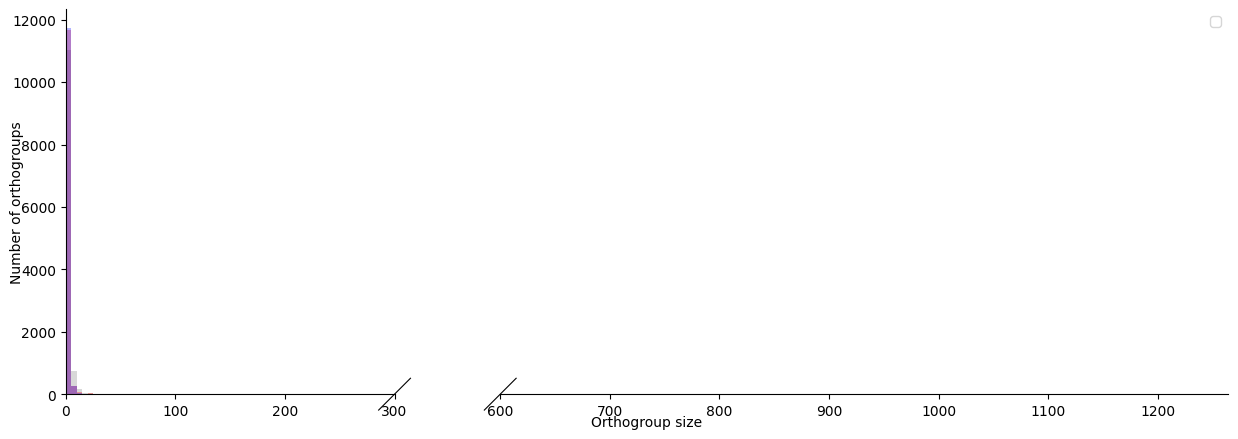

In [98]:
fig = plt.figure(figsize=(15, 5))
bax = brokenaxes(xlims=((0, 300), (600, max(Au3_Orthogroups['sum'])+10)), hspace=.05)  # Adjust xlims as needed

# Plot histograms
bax.hist(Au3_Orthogroups['sum'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 5), color='grey', alpha=0.3)
bax.hist(Au3_Orthogroups['Au3_hapA_count'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 5), color='red', alpha=0.3)
bax.hist(Au3_Orthogroups['Au3_hapB_count'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 5), color='blue', alpha=0.3)

# Add legend
bax.legend(['sum', 'Au3_hapA_count', 'Au3_hapB_count'])

# Set labels
bax.set_xlabel('Orthogroup size')
#bax.set_xticks(np.arange(0, max(Au3_Orthogroups['sum'])+10, 50))
bax.set_ylabel('Number of orthogroups')

# Show plot
plt.show()

In [100]:
Au3_duplicate_gene

7548

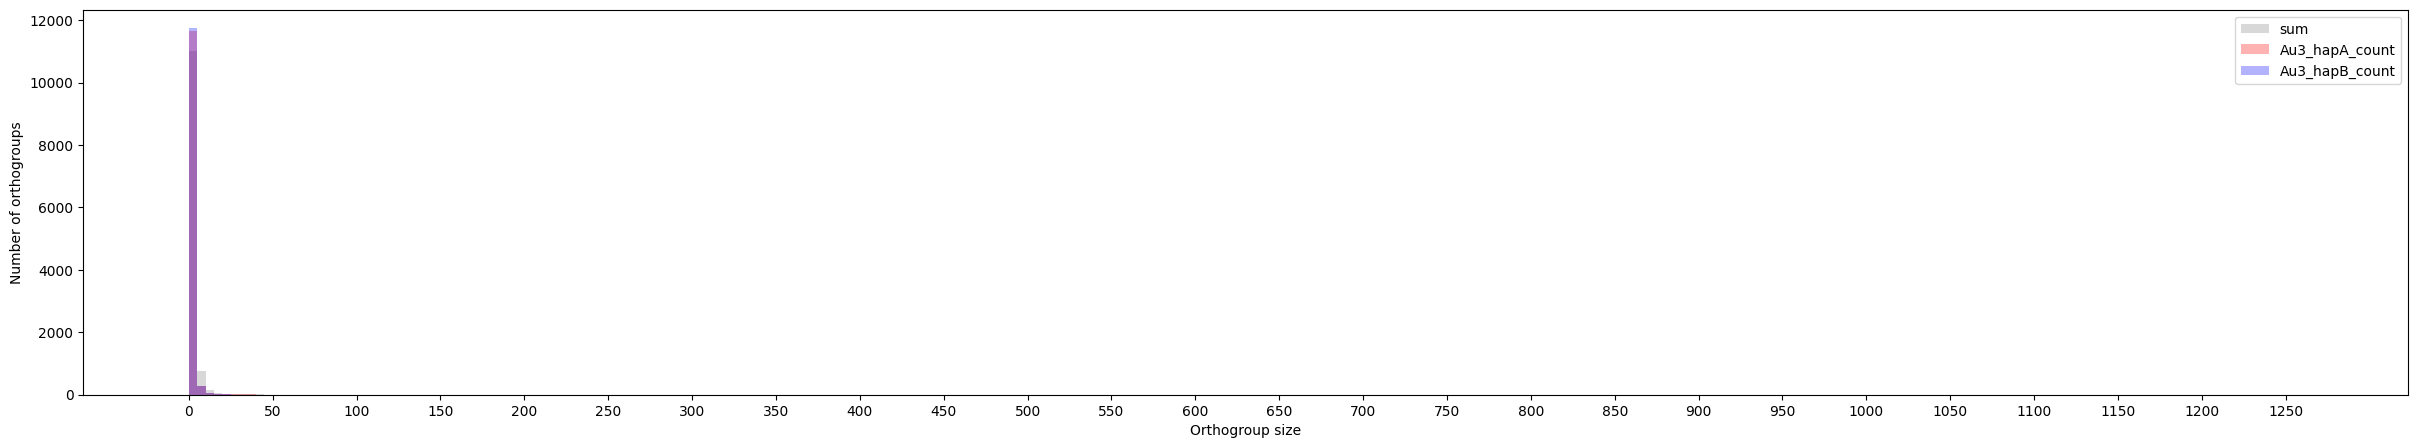

In [83]:
#set figure size
plt.figure(figsize=(30, 5))
plt.hist(Au3_Orthogroups['sum'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 5), color='grey', alpha=0.3)
plt.hist(Au3_Orthogroups['Au3_hapA_count'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 5), color='red', alpha=0.3)
plt.hist(Au3_Orthogroups['Au3_hapB_count'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 5), color='blue', alpha=0.3)
plt.legend(['sum', 'Au3_hapA_count', 'Au3_hapB_count'])
#sns.displot(Au3_Orthogroups['sum'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 30), color='grey', alpha=0.3)
#sns.displot(Au3_Orthogroups['Au3_hapA_count'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 30), color='red', alpha=0.3)
#sns.displot(Au3_Orthogroups['Au3_hapB_count'], bins=np.arange(0, max(Au3_Orthogroups['sum'])+10, 30), color='blue', alpha=0.3)
plt.xlabel('Orthogroup size')
plt.xticks(np.arange(0, max(Au3_Orthogroups['sum'])+10, 50))
#plt.yticks(np.arange(0, 80, 10))
plt.ylabel('Number of orthogroups')

plt.show()

In [68]:
test = Orthogroups[Orthogroups['sum']>=30]
sum(test['Au3_hapB_count'])

2712.0

In [4]:
def count_members(Orthgroups_tsv):
    Orthogroups = pd.read_csv(Orthgroups_tsv, sep='\t')
    columns = Orthogroups.columns 
    samples = []
    for column in columns:
        if column != 'Orthogroup':
            samples.append(column)
    tmp_column = []
    for s in samples:
        tmp2_column = s + '_count'
        tmp_column.append(tmp2_column)
        Orthogroups[tmp2_column] = Orthogroups[s].str.count(',') + 1
    tmp_column.append('Orthogroup')
    Orthogroups = Orthogroups[tmp_column]
    return Orthogroups

In [5]:
#Read interproscan result
def read_Interproscan(Interproscan):
    Interproscan = pd.read_csv(Interproscan, sep='\t', header=None)
    Interproscan = Interproscan[[0, 3, 4, 5, 11, 12]]
    Interproscan.columns = ['Gene', 'Database', 'hit-ID1', 'Description', 'IPR-ID', 'IPR-Description']
    return Interproscan

In [6]:
def find_TE(Interproscan, genes):
    Interproscan = Interproscan[Interproscan['Gene'].isin(genes)]
    Database = ['Pfam', 'Gene3D', 'SUPERFAMILY', 'SMART', 'PANTHER']
    return Interproscan

In [8]:
MF1_orthogroups, MF1_genes = filter_Orthogroups('MF1_Orthogroups.tsv', 20, 10)
MF1_interpro = read_Interproscan('MF1.faa.tsv')

TypeError: filter_Orthogroups() missing 1 required positional argument: 'bearable_single_count'

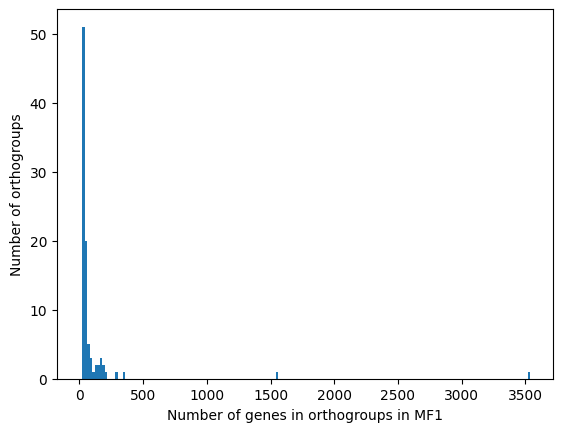

In [182]:
plt.hist(MF1_orthogroups['sum'], bins=np.arange(0, max(MF1_orthogroups['sum'])+20, 20))
plt.xlabel('Number of genes in orthogroups in MF1')
plt.xticks(np.arange(0, max(MF1_orthogroups['sum'])+100, 500))
plt.ylabel('Number of orthogroups')
plt.show()


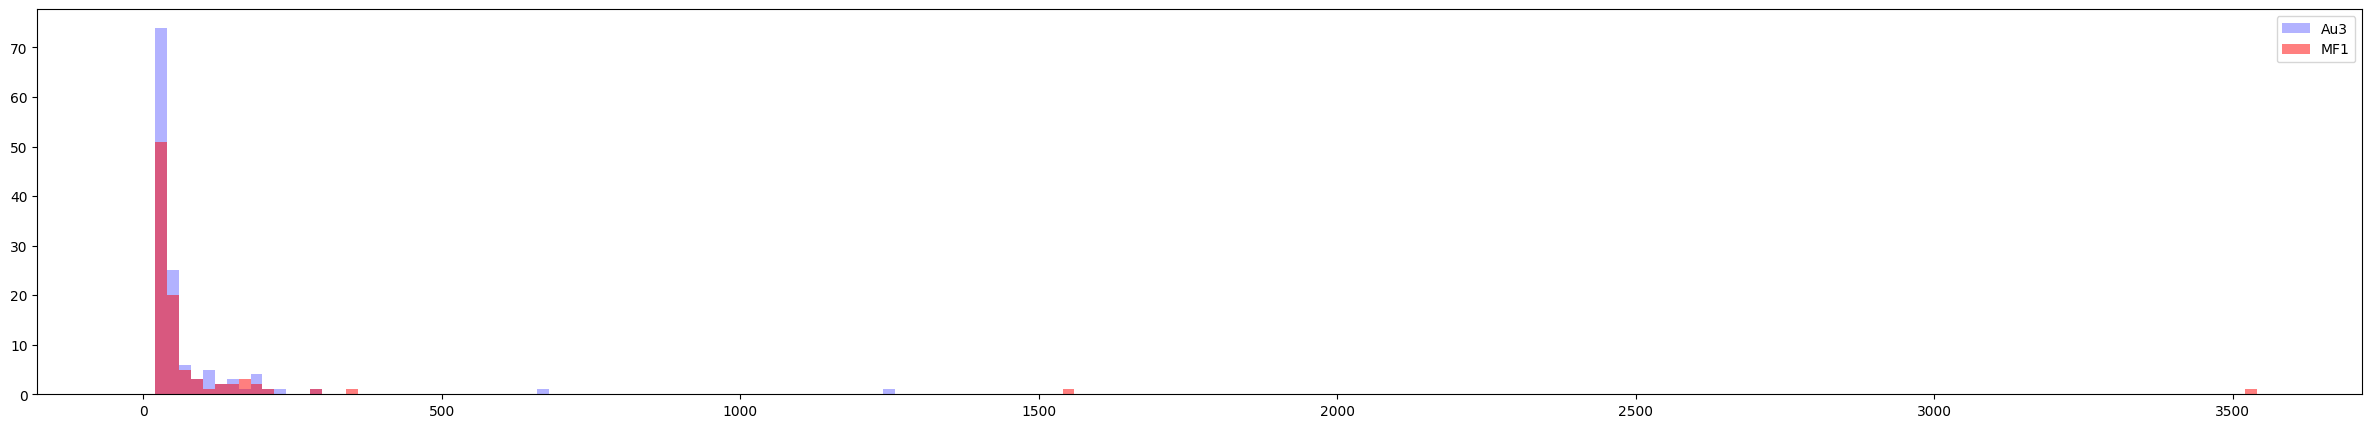

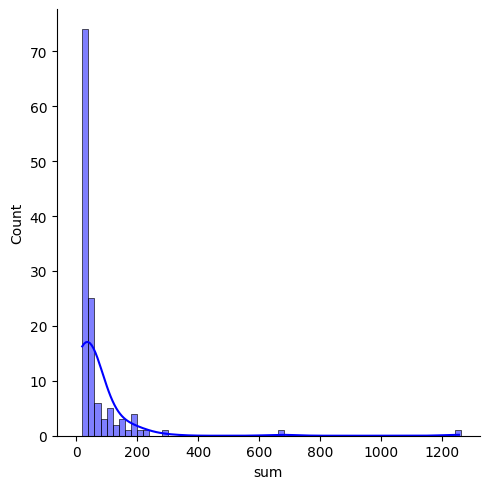

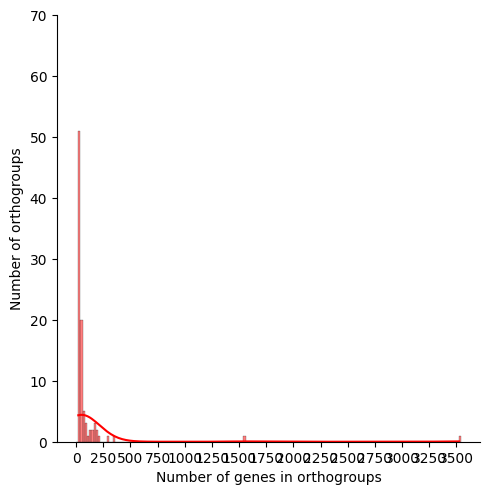

In [198]:
#set figure size
plt.figure(figsize=(30, 5))
plt.hist(Au3_orthogroups['sum'], bins=np.arange(0, max(Au3_orthogroups['sum'])+20, 20), color='blue', alpha=0.3)
plt.hist(MF1_orthogroups['sum'], bins=np.arange(0, max(MF1_orthogroups['sum'])+20, 20), color='red', alpha=0.5)
plt.legend(['Au3', 'MF1'])
sns.displot(Au3_orthogroups['sum'], bins=np.arange(0, max(Au3_orthogroups['sum'])+20, 20), color='blue', kde=True)
sns.displot(MF1_orthogroups['sum'], bins=np.arange(0, max(MF1_orthogroups['sum'])+20, 20), color='red', kde=True)
plt.xlabel('Number of genes in orthogroups')
plt.xticks(np.arange(0, max(MF1_orthogroups['sum'])+100, 250))
plt.yticks(np.arange(0, 80, 10))
plt.ylabel('Number of orthogroups')

plt.show()

In [217]:
MF1_orthogroups_2 = MF1_orthogroups[['Orthogroup', 'sum']]
Au3_orthogroups_2 = Au3_orthogroups[['Orthogroup' , 'sum']]
MF1_orthogroups_2['Orthogroup'] = MF1_orthogroups_2['Orthogroup'] + '_MF1'
MF1_orthogroups_2['isolate'] = 'MF1'
Au3_orthogroups_2['Orthogroup'] = Au3_orthogroups_2['Orthogroup'] + '_Au3'
Au3_orthogroups_2['isolate'] = 'Au3'
orthogroups = pd.concat([MF1_orthogroups_2, Au3_orthogroups_2])

/tmp/ipykernel_31946/3465676840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MF1_orthogroups_2['Orthogroup'] = MF1_orthogroups_2['Orthogroup'] + '_MF1'
/tmp/ipykernel_31946/3465676840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MF1_orthogroups_2['isolate'] = 'MF1'
/tmp/ipykernel_31946/3465676840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

<Figure size 2000x500 with 0 Axes>

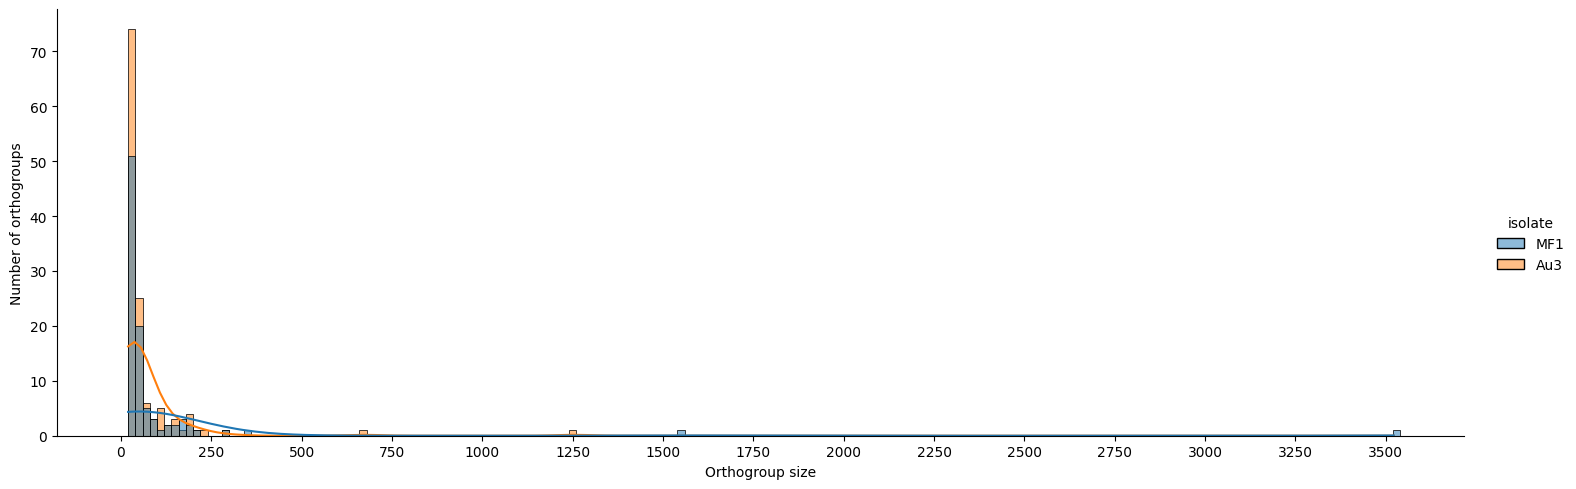

In [245]:
plt.figure(figsize=(20, 5))
sns.displot(orthogroups, x='sum', hue='isolate', bins=np.arange(0, max(orthogroups['sum'])+20, 20), kde=True, alpha=0.5, aspect=3)
plt.xlabel('Orthogroup size')
plt.xticks(np.arange(0, max(orthogroups['sum'])+100, 250))
plt.yticks(np.arange(0, 80, 10))
plt.ylabel('Number of orthogroups')
plt.show()

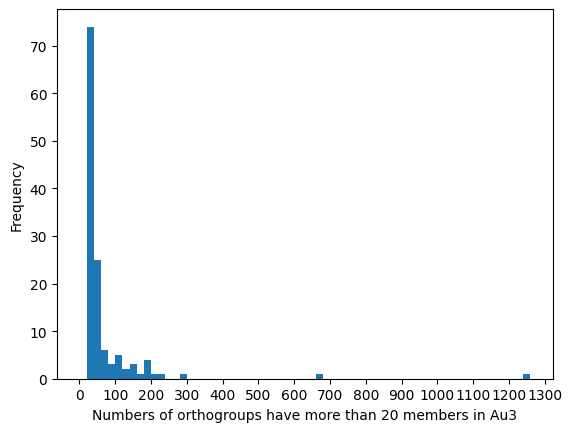

In [173]:
#plot graph to show the distribution of gene number in each orthogroup
import matplotlib.pyplot as plt
plt.hist(test['sum'], bins=np.arange(0, max(test['sum'])+20, 20))
plt.xlabel('Numbers of orthogroups have more than 20 members in Au3')
plt.xticks(np.arange(0, max(test['sum'])+100, 100))
plt.ylabel('Frequency')
plt.show()

In [249]:
Database = ['Pfam', 'Gene3D', 'SUPERFAMILY', 'SMART', 'PANTHER']
test4 = test3[test3['Database'].isin(Database)]
search_description = ['transposon', 'retrotransposon', 'transposase', 'gag', 'ty3', 'copia']
search_ID = ['PF00075', 'PF00078', 'PF00665', 'PF02925', 'PF02992', 'PF03184', 'PF03221', 'PF03732', 'PF04687', 'PF05699', 'PF05840', 'PF05970', 'PF07727', 'PF08283', 'PF08284', 'PF10551', 'PF13358', 'PF13359', 'PF13456', 'PF13837', 'PF13976', 'PF14214', 'PF14223', 'PF14529']
test4 = test4[test4['Description'].str.contains('|'.join(search_description), case=False) | test4['hit-ID1'].str.contains('|'.join(search_ID), case=False)]
len(test4['Gene'].unique())

619

In [251]:
#Save Gene list
test4['Gene'].to_csv('TE_genes.txt', index=False)

In [17]:
rust_orthogroups, rust_genes = filter_Orthogroups('rust_Orthogroups.tsv', 40, 10)

In [18]:
rust_orthogroups

,Orthogroup,Au3_hapA,Au3_hapB,GM1_hapA,GM1_hapB,JM1_hapA,JM1_hapB,MF1_hapA,MF1_hapB,Pst104E_hapA,...,GM1_hapB_count,JM1_hapA_count,JM1_hapB_count,MF1_hapA_count,MF1_hapB_count,Pst104E_hapA_count,Pst104E_hapB_count,Pt76_hapA_count,Pt76_hapB_count,sum


In [9]:
MF1_OG = pd.read_csv('rust_Orthogroups.tsv', sep='\t' , header=0)
MF1_OG = MF1_OG[['Orthogroup', 'MF1_hapA', 'MF1_hapB']]
MF1_OG['MF1_hapA_count'] = MF1_OG['MF1_hapA'].str.count(',') + 1
MF1_OG['MF1_hapB_count'] = MF1_OG['MF1_hapB'].str.count(',') + 1
#fill na with 0
MF1_OG = MF1_OG.fillna(0)
MF1_OG['sum'] = MF1_OG['MF1_hapA_count'] + MF1_OG['MF1_hapB_count']
MF1_OG = MF1_OG[MF1_OG['sum']>=20]
#sort by sum
MF1_OG = MF1_OG.sort_values(by='sum', ascending=False)
MF1_OG= MF1_OG.reset_index(drop=True)
MF1_OG = MF1_OG.dropna()
#get sum of each orthogroup
#Save MF1_hapA and MF1_hapB genes
MF1_duplicate_genes = []
#MF1_hapB_genes = []
for i in range(len(MF1_OG)):
    MF1_hapA = str(MF1_OG.loc[i, 'MF1_hapA']).split(',')
    MF1_hapB = str(MF1_OG.loc[i, 'MF1_hapB']).split(',')
    for gene in MF1_hapA:
        MF1_duplicate_genes.append(gene)
    for gene in MF1_hapB:
        MF1_duplicate_genes.append(gene)

In [91]:
MF1_duplicate_genes = set(MF1_duplicate_genes)
#drop 0
MF1_duplicate_genes = [x for x in MF1_duplicate_genes if x != '0']
#save the genes
MF1_duplicate_genes = pd.DataFrame(MF1_duplicate_genes)
#MF1_duplicate_genes
#MF1_duplicate_genes.to_csv('MF1_duplicate_genes.txt', index=False)

In [98]:
MF1_duplicate_genes = set(MF1_duplicate_genes)
MF1_duplicate_genes = [x for x in MF1_duplicate_genes if x != '0']
len(MF1_duplicate_genes)

10159

In [65]:
len(MF1_duplicate_genes)

8774

In [67]:
count = count_members('rust_Orthogroups.tsv')

In [83]:
#Find OG with every column have more thna 10
OG, gene = filter_Orthogroups('rust_Orthogroups.tsv', 40, 4)


In [12]:
OG

NameError: name 'OG' is not defined

In [69]:
#Merge column with same species
species = []
for column in count.columns:
    if column != 'Orthogroup':
        species_tmp = column.split('_')[0]
        if species_tmp not in species:
            species.append(species_tmp)
count_species = pd.DataFrame()
#fill NaN with 0
count = count.fillna(0)
for s in species:
    hapA = s + '_hapA_count'
    hapB = s + '_hapB_count'
    count_species[s] = count[hapA] + count[hapB]
count_species_df = pd.DataFrame()
for i in count_species.columns:
    sub_df = pd.DataFrame(count_species[i])
    sub_df = sub_df[sub_df[i] != 0]
    sub_df['Species'] = i
    #Rename the column
    sub_df.columns = ['Count', 'Species']
    count_species_df = pd.concat([count_species_df, sub_df])

In [70]:
count_species_df[count_species_df['Count'] >=20].groupby('Species').count()

,Count
Species,
Au3,127
GM1,98
JM1,115
MF1,149
Pst104E,10
Pt76,22


In [71]:
count_species_df

,Count,Species
0,10.0,Au3
1,43.0,Au3
2,4.0,Au3
3,421.0,Au3
4,17.0,Au3
...,...,...
28242,2.0,Pt76
28243,2.0,Pt76
28244,2.0,Pt76
28245,2.0,Pt76


<Figure size 1000x500 with 0 Axes>

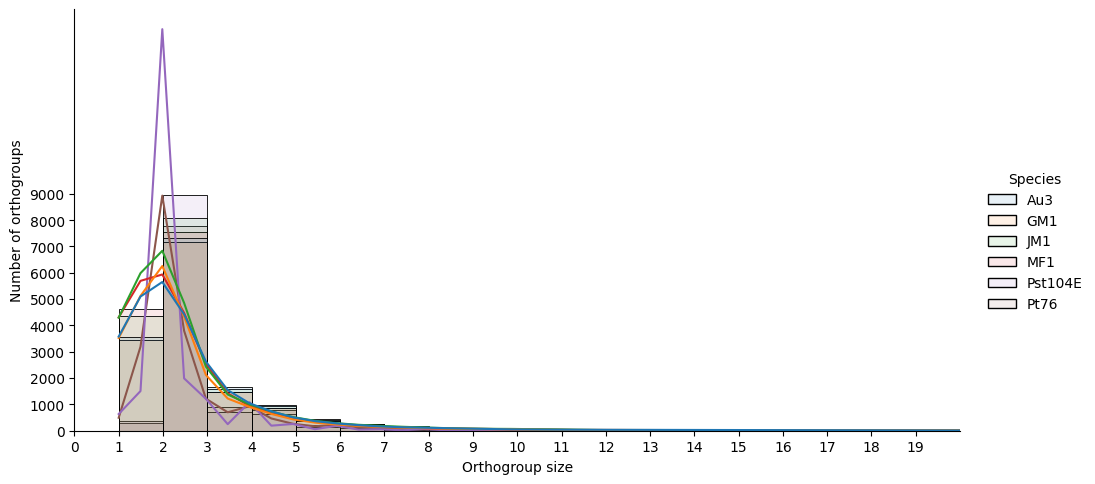

In [74]:
plt.figure(figsize=(10, 5))
count_species_df2 = count_species_df[count_species_df['Count'] <= 100]
sns.displot(count_species_df2, x='Count', hue='Species', bins=np.arange(0, max(count_species_df2['Count'])+1, 1), kde=True, alpha=0.1, aspect=2, fill=True)
plt.xlabel('Orthogroup size')
plt.xticks(np.arange(0, 20, 1))
plt.xlim(0, 20)
plt.yticks(np.arange(0, 10000, 1000))
plt.ylabel('Number of orthogroups')
plt.show()

In [30]:


for i in count.columns:
    species = i.split('_')[0]

    if i != 'Orthogroup':
        tmp_df = count[i].reset_index()
        tmp_df = tmp_df.dropna()
        print(tmp_df)


0          6.0
2          1.0
3        407.0
4         10.0
5          2.0
         ...  
19708      1.0
19709      1.0
19710      1.0
19711      1.0
19712      1.0
Name: Au3_hapA_count, Length: 12704, dtype: float64
0         4.0
1        43.0
2         3.0
3        14.0
4         7.0
         ... 
20120     1.0
20121     1.0
20122     1.0
20123     1.0
20124     1.0
Name: Au3_hapB_count, Length: 12279, dtype: float64
0        1.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
20539    1.0
20540    1.0
20541    1.0
20542    1.0
20543    1.0
Name: GM1_hapA_count, Length: 12166, dtype: float64
1         50.0
2        429.0
4        254.0
5          1.0
6          4.0
         ...  
20754      1.0
20755      1.0
20756      1.0
20757      1.0
20758      1.0
Name: GM1_hapB_count, Length: 11409, dtype: float64
0         3.0
1        10.0
2         1.0
3         1.0
4         4.0
         ... 
21296     1.0
21297     1.0
21298     1.0
21299     1.0
21300     1.0
Name: JM1_h

In [8]:
Au3_orthogroups

,Orthogroup,Au3_hapA,Au3_hapB,Au3_hapA_count,Au3_hapB_count,sum
2,OG0000002,"MK676_000018-T1, MK676_000059-T1, MK676_000255...","MK675_009150-T1, MK675_012173-T1, MK675_013643...",293.0,5.0,298.0
83,OG0000083,"MK676_000151-T1, MK676_000711-T1, MK676_003655...","MK676_022059-T1, MK676_022229-T1, MK676_022242...",21.0,6.0,27.0
84,OG0000084,"MK676_000828-T1, MK676_002566-T1, MK676_004321...","MK675_000891-T1, MK675_001975-T1, MK675_002896...",5.0,22.0,27.0
86,OG0000086,"MK676_007568-T1, MK676_011391-T1, MK676_012405...","MK675_001406-T1, MK675_002083-T1, MK675_003413...",5.0,22.0,27.0
88,OG0000088,"MK676_004683-T1, MK676_006367-T1, MK676_006844...","MK675_000510-T1, MK675_002901-T1, MK675_003033...",5.0,21.0,26.0
94,OG0000094,"MK676_014389-T1, MK676_015644-T1, MK676_017850...","MK675_009463-T1, MK676_022103-T1, MK676_022172...",5.0,20.0,25.0
